In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from datetime import datetime, timedelta

In [2]:
# custom packages
from utils_dates import find_date_range, extract_date
from utils_analysis import customer_detail, partial_pipeline_summary
from utils_visualizations_v2 import vialualize_partial_pipeline, vialualize_total_pipeline

In [3]:
# Custom settings: Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Custom settings: Filter or ignore the warning
#import warnings
#warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)

In [4]:
df_pre = pd.read_csv('original_files/Pre-FTB_Report.csv')
df_post = pd.read_csv('original_files/Post-FTB_Report.csv')

df_pre['Annual hotel spend'] = df_pre['Annual hotel spend'].fillna(0).astype(int)
df_post['Annual hotel spend'] = df_post['Annual hotel spend'].fillna(0).astype(int)

In [5]:
# difference in the input files from pre to post
# the FTB includes both date and time
#  we just need the date
df_post['Expected FTB Date'] = [extract_date(date_time) for date_time in df_post['FTB or Revival Date'] ]
df_post = df_post.drop('FTB or Revival Date', axis=1)

In [6]:

pre_owners = np.sort(np.array(df_pre['Opportunity Owner'].unique()))
post_owners = np.sort(np.array(df_post['Opportunity Owner'].unique()))

missing_owners = [owner for owner in pre_owners if owner not in post_owners]

  # I will only keep owners that are in both pre and post reports

  # Convert arrays to sets
set1 = set(pre_owners)
set2 = set(post_owners)

  # Find the intersection of the sets
common_elements = set1.intersection(set2)

  # Convert the common elements set back to a list
names = list(common_elements)

  # sort it alphabetically by family name
owners_list = sorted(names, key=lambda x: x.split()[1])

In [7]:
owner = owners_list[0]
owner

'Justine Bannon'

In [8]:
# DETAIL DATA
detail_pre = customer_detail(df_pre,owner)
detail_post = customer_detail(df_post,owner)
detail_pre.set_index('Account Name', inplace=True)
detail_post.set_index('Account Name', inplace=True)

/Users/Enrico/Desktop/Pipeline-main/utils_analysis.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[str(current_date.strftime("%b %Y"))] = col
/Users/Enrico/Desktop/Pipeline-main/utils_analysis.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[str(current_date.strftime("%b %Y"))] = col


In [9]:
# PIPELINE DATA
summ_pre = partial_pipeline_summary( detail_pre , detail_type = 'pre' )
summ_post = partial_pipeline_summary( detail_post , detail_type = 'post' )
merged_df = pd.concat([summ_post,summ_pre], sort=False).fillna(0)

In [10]:
  # Calculate the sum of pre and post
  #Reconstruct the dataframe adding the sum of confirmed and expected:
df = pd.DataFrame(np.vstack((
    np.array(merged_df), 
    np.array(merged_df)[0]+np.array(merged_df)[2]))  )

  # Reassign column names:
df.columns = list(merged_df)

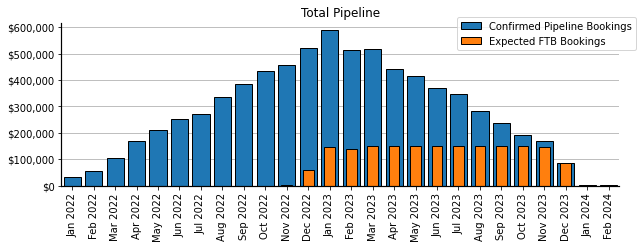

In [11]:
# visualization
df_total = df.iloc[4]
df_expected = df.iloc[2]
vialualize_total_pipeline (df_total,df_expected)

In [12]:
df

,Jan 2022,Feb 2022,Mar 2022,Apr 2022,May 2022,Jun 2022,Jul 2022,Aug 2022,Sep 2022,Oct 2022,Nov 2022,Dec 2022,Jan 2023,Feb 2023,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023,Aug 2023,Sep 2023,Oct 2023,Nov 2023,Dec 2023,Jan 2024,Feb 2024
0,33335.0,54170.0,103839.0,168845.0,209411.0,253996.0,271497.0,335914.0,385248.0,432748.0,451499.0,463499.0,442664.0,377412.0,368827.0,290488.0,266588.0,222003.0,196169.0,134252.0,86584.0,43251.0,24500.0,0.0,0.0,0.0
1,7.0,12.0,22.0,32.0,37.0,45.0,50.0,58.0,64.0,69.0,73.0,74.0,69.0,57.0,53.0,42.0,39.0,31.0,25.0,17.0,11.0,7.0,3.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4167.0,58002.0,145688.0,137355.0,149855.0,149855.0,149855.0,149855.0,149855.0,149855.0,149855.0,149855.0,145688.0,87686.0,4167.0,4167.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,23.0,22.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,23.0,14.0,1.0,1.0
4,33335.0,54170.0,103839.0,168845.0,209411.0,253996.0,271497.0,335914.0,385248.0,432748.0,455666.0,521501.0,588352.0,514767.0,518682.0,440343.0,416443.0,371858.0,346024.0,284107.0,236439.0,193106.0,170188.0,87686.0,4167.0,4167.0


In [16]:
  # reassign index names
index_names = ['$ Confirmed Pipeline Bookings',
  '# Confirmed Pipeline Accounts',
  '$ Expected FTB Bookings',
  '# Expected FTB Accounts',
  '$ Total Pipeline']

df = df.set_index(pd.Index(index_names))
df.style.format("{:.0f}")
df.applymap('{:,.0f}'.format)

,Jan 2022,Feb 2022,Mar 2022,Apr 2022,May 2022,Jun 2022,Jul 2022,Aug 2022,Sep 2022,Oct 2022,Nov 2022,Dec 2022,Jan 2023,Feb 2023,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023,Aug 2023,Sep 2023,Oct 2023,Nov 2023,Dec 2023,Jan 2024,Feb 2024
$ Confirmed Pipeline Bookings,"33,335","54,170","103,839","168,845","209,411","253,996","271,497","335,914","385,248","432,748","451,499","463,499","442,664","377,412","368,827","290,488","266,588","222,003","196,169","134,252","86,584","43,251","24,500",0,0,0
# Confirmed Pipeline Accounts,7,12,22,32,37,45,50,58,64,69,73,74,69,57,53,42,39,31,25,17,11,7,3,0,0,0
$ Expected FTB Bookings,0,0,0,0,0,0,0,0,0,0,"4,167","58,002","145,688","137,355","149,855","149,855","149,855","149,855","149,855","149,855","149,855","149,855","145,688","87,686","4,167","4,167"
# Expected FTB Accounts,0,0,0,0,0,0,0,0,0,0,1,9,23,22,24,24,24,24,24,24,24,24,23,14,1,1
$ Total Pipeline,"33,335","54,170","103,839","168,845","209,411","253,996","271,497","335,914","385,248","432,748","455,666","521,501","588,352","514,767","518,682","440,343","416,443","371,858","346,024","284,107","236,439","193,106","170,188","87,686","4,167","4,167"


In [14]:
df

,Jan 2022,Feb 2022,Mar 2022,Apr 2022,May 2022,Jun 2022,Jul 2022,Aug 2022,Sep 2022,Oct 2022,Nov 2022,Dec 2022,Jan 2023,Feb 2023,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023,Aug 2023,Sep 2023,Oct 2023,Nov 2023,Dec 2023,Jan 2024,Feb 2024
$ Confirmed Pipeline Bookings,33335.0,54170.0,103839.0,168845.0,209411.0,253996.0,271497.0,335914.0,385248.0,432748.0,451499.0,463499.0,442664.0,377412.0,368827.0,290488.0,266588.0,222003.0,196169.0,134252.0,86584.0,43251.0,24500.0,0.0,0.0,0.0
# Confirmed Pipeline Accounts,7.0,12.0,22.0,32.0,37.0,45.0,50.0,58.0,64.0,69.0,73.0,74.0,69.0,57.0,53.0,42.0,39.0,31.0,25.0,17.0,11.0,7.0,3.0,0.0,0.0,0.0
$ Expected FTB Bookings,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4167.0,58002.0,145688.0,137355.0,149855.0,149855.0,149855.0,149855.0,149855.0,149855.0,149855.0,149855.0,145688.0,87686.0,4167.0,4167.0
# Expected FTB Accounts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,23.0,22.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,23.0,14.0,1.0,1.0
$ Total Pipeline,33335.0,54170.0,103839.0,168845.0,209411.0,253996.0,271497.0,335914.0,385248.0,432748.0,455666.0,521501.0,588352.0,514767.0,518682.0,440343.0,416443.0,371858.0,346024.0,284107.0,236439.0,193106.0,170188.0,87686.0,4167.0,4167.0


In [ ]:
# Prospects (PRE-FTB) DETAIL
vialualize_partial_pipeline (detail_pre,detail_type='pre')

In [ ]:
# Prospects (PRE-FTB) DETAIL
  with st.expander('Prospects (Pre-FTB) Detail'):
    col1, col2 = st.columns(2)
    with col1:
      st.subheader('Prospects (Pre-FTB) Detail')
      
      st.pyplot(plt)
    with col2:
      st.empty()
    st.dataframe(detail_pre)


# Customers (POST-FTB) DETAIL
  with st.expander('Customers (Post-FTB) Detail'):
    col1, col2 = st.columns(2)
    with col1:
      st.subheader('Prospects (Pre-FTB) Detail')
      vialualize_partial_pipeline (detail_post,detail_type='post')
      st.pyplot(plt)
    with col2:
      st.empty()
    st.dataframe(detail_post)

In [ ]:
import streamlit as st
# Set the width of the Streamlit application
st.set_page_config(layout="wide")

from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from datetime import datetime, timedelta

# custom packages
from utils_dates import find_date_range, extract_date
from utils_analysis import customer_detail, partial_pipeline_summary
from utils_visualizations import vialualize_partial_pipeline, vialualize_total_pipeline


# Custom settings: Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Custom settings: Filter or ignore the warning
import warnings
warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)

In [ ]:
df_pre = pd.read_csv('original_files/Pre-FTB_Report.csv')
df_post = pd.read_csv('original_files/Post-FTB_Report.csv')

df_pre['Annual hotel spend'] = df_pre['Annual hotel spend'].fillna(0).astype(int)
df_post['Annual hotel spend'] = df_post['Annual hotel spend'].fillna(0).astype(int)

In [ ]:
# difference in the input files from pre to post
# the FTB includes both date and time
#  we just need the date
df_post['Expected FTB Date'] = [extract_date(date_time) for date_time in df_post['FTB or Revival Date'] ]
df_post = df_post.drop('FTB or Revival Date', axis=1)

In [ ]:
pre_owners = np.sort(np.array(df_pre['Opportunity Owner'].unique()))
post_owners = np.sort(np.array(df_post['Opportunity Owner'].unique()))
missing_owners = [owner for owner in pre_owners if owner not in post_owners]
# I will only keep owners that are in both pre and post reports
# Convert arrays to sets
set1 = set(pre_owners)
set2 = set(post_owners)
# Find the intersection of the sets
common_elements = set1.intersection(set2)
# Convert the common elements set back to a list
names = list(common_elements)
# sort it alphabetically by family name
owners_list = sorted(names, key=lambda x: x.split()[1])

In [ ]:
owner = 'Adam Ward'

In [ ]:
detail_pre = customer_detail(df_pre,owner)
detail_post = customer_detail(df_post,owner)
detail_pre.set_index('Account Name', inplace=True)
detail_post.set_index('Account Name', inplace=True)

In [ ]:
# ...

In [ ]:
summ_pre = partial_pipeline_summary( detail_pre , detail_type = 'pre' )
summ_post = partial_pipeline_summary( detail_post , detail_type = 'post' )
merged_df = pd.concat([summ_post,summ_pre], sort=False).fillna(0)

In [ ]:
#Reconstruct the dataframe adding the sum of confirmed and expected:
df = pd.DataFrame(np.vstack((
    np.array(merged_df), 
    np.array(merged_df)[0]+np.array(merged_df)[2]))  )

# Reassign column names:
df.columns = list(merged_df)

# reassign index names
index_names = ['$ Confirmed Pipeline Bookings',
'# Confirmed Pipeline Accounts',
'$ Expected FTB Bookings',
'# Expected FTB Accounts',
'$ Total Pipeline']

df = df.set_index(pd.Index(index_names))
dfcommas = df.applymap('{:,.0f}'.format)

In [ ]:
df = dfcommas
# Define a dictionary of custom colors for specific rows
custom_colors = {#'$ Confirmed Pipeline Bookings': 'white', 
                #'# Confirmed Pipeline Accounts': 'white',
                #'$ Expected FTB Booking': 'lightgray', 
                #'# Expected FTB Accounts': 'white',
                '$ Total Pipeline':'lightyellow'
                }

# Function to apply custom colors to rows
def apply_custom_colors(row):
    row_index = row.name
    if row_index in custom_colors:
        return ['background-color: {}'.format(custom_colors[row_index])] * len(row)
    else:
        return [''] * len(row)
    
# Apply the custom colors to the dataframe
styled_df = df.style.apply(apply_custom_colors, axis=1)
# Display the styled dataframe
  
df_total = merged_df.loc['$ Total Pipeline']
df_expected = merged_df.loc['$ Expected FTB Booking']

col1, col2 = st.columns(2)

vialualize_total_pipeline (df_total,df_expected)
    

In [ ]:
styled_df

In [ ]:
# Prospects (PRE-FTB) DETAIL
vialualize_partial_pipeline (detail_pre,detail_type='pre')

In [ ]:
detail_pre

In [ ]:
# Customers (POST-FTB) DETAIL
vialualize_partial_pipeline (detail_post,detail_type='post')

In [ ]:
detail_post